In [1]:
## Aim: Collect,clean,organize and analyze the data about the vaccination drive going on in the country.

In [2]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(r"F:\Python\c3.csv")

In [4]:
df1.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Vaccinated
0,2021-08-11,Uttar Pradesh,1685492,22775,1708812,112793578
1,2021-08-11,Maharashtra,6159676,134201,6363442,85669714
2,2021-08-11,Madhya Pradesh,781330,10514,791980,64830967
3,2021-08-11,Gujarat,814802,10077,825085,63364436
4,2021-08-11,West Bengal,1506532,18252,1534999,61904058


In [5]:
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  9 non-null      object
 1   State/UnionTerritory  9 non-null      object
 2   Cured                 9 non-null      int64 
 3   Deaths                9 non-null      int64 
 4   Confirmed             9 non-null      int64 
 5   Vaccinated            9 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 560.0+ bytes


In [6]:
# conclusion: the data is upto date and there are no values missing in it, we can go ahead and analyze it. 

In [7]:
# date is in a string format
# convert it into date-time format
df1['Date_new'] = pd.to_datetime(df1['Date']) 

# make separate columns for month and year by using a lamda expresion
df1['month'] = df1['Date_new'].apply(lambda m:m.month)
df1['year'] = df1['Date_new'].apply(lambda y:y.year)
df1.drop('Date',axis=1,inplace=True)
df1.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,Vaccinated,Date_new,month,year
0,Uttar Pradesh,1685492,22775,1708812,112793578,2021-08-11,8,2021
1,Maharashtra,6159676,134201,6363442,85669714,2021-08-11,8,2021
2,Madhya Pradesh,781330,10514,791980,64830967,2021-08-11,8,2021
3,Gujarat,814802,10077,825085,63364436,2021-08-11,8,2021
4,West Bengal,1506532,18252,1534999,61904058,2021-08-11,8,2021


<AxesSubplot:xlabel='State/UnionTerritory', ylabel='Vaccinated'>

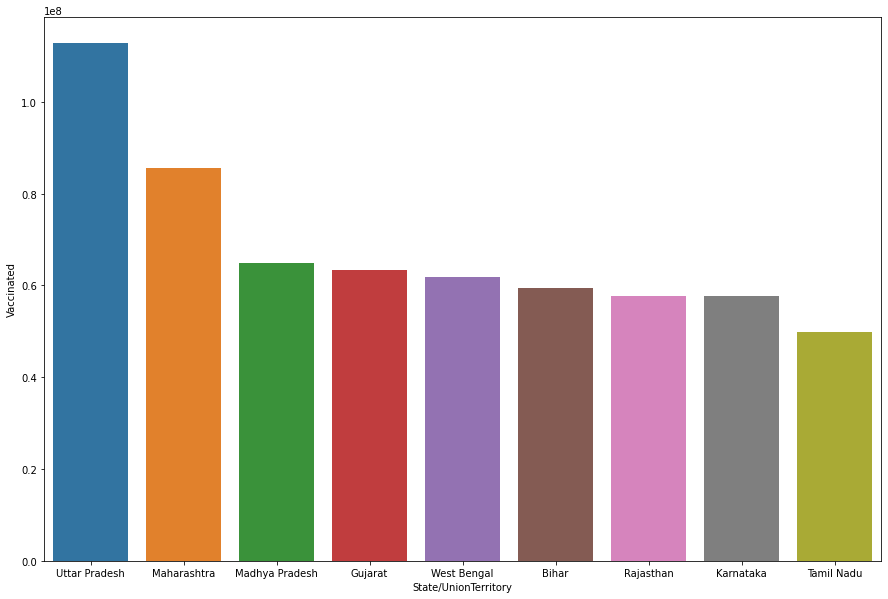

In [8]:
# visualize the data, and check whether you can draw some interesting insights

plt.figure(figsize = (15,10))
sns.barplot(y='Vaccinated',x='State/UnionTerritory',data=df1)




In [9]:
#It is clear from the barplot that Uttar Pradesh has the highest number of people vaccinated in the country

<AxesSubplot:xlabel='State/UnionTerritory', ylabel='Cured'>

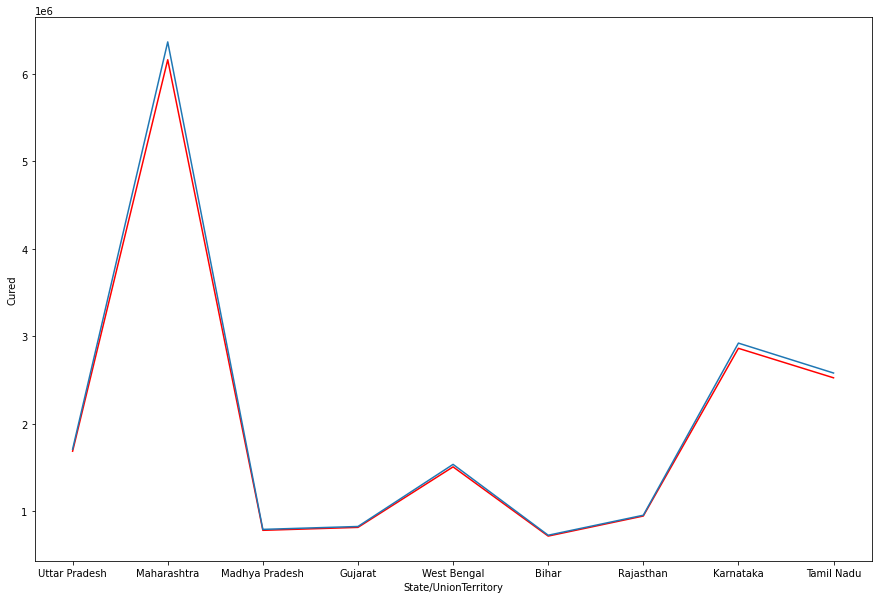

In [10]:
plt.figure(figsize = (15,10))
sns.lineplot(x='State/UnionTerritory',y='Cured',data=df1,color='r')
sns.lineplot(x='State/UnionTerritory',y='Confirmed',data=df1)


In [11]:
#from the below linegraph we conclude that Maharashtra has the highest number of people cured from Covid_19
# Also as the blue and the red line almost coincides, we can conclude that the recovery rate is approx. around 98-99%

In [12]:
#check if variables are in some way correlated to each other
co_relation = df1.corr()['Deaths']
co_relation 



Cured         0.980695
Deaths        1.000000
Confirmed     0.981706
Vaccinated    0.320609
month              NaN
year               NaN
Name: Deaths, dtype: float64

In [13]:
# By this correlation our prediction about the recovery rate is validated and it is about 98.06%

<AxesSubplot:>

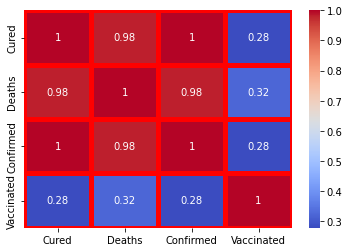

In [14]:
sns.heatmap(df1.drop(['month','year'],axis=1).corr(),cmap='coolwarm',annot=True,linecolor='r',linewidths=5)

<AxesSubplot:ylabel='Density'>

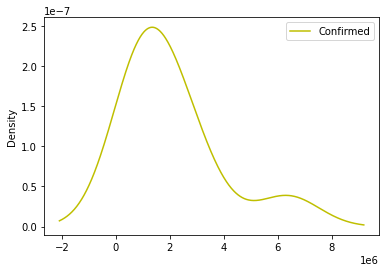

In [15]:
df1.plot(kind='kde',x='State/UnionTerritory',y='Confirmed',color='y')